In [ ]:
import awkward as ak
import uproot
import numpy as np
import matplotlib.pyplot as plt
from graph_nets import utils_np
import networkx as nx
import sonnet as snt
import tensorflow as tf
import os

import sys
sys.path.append('/home/jbohm/start_tf/gn4pions_eastbay/')
from gn4pions.modules.utils import convert_to_tuple
from gn4pions.modules.data import GraphDataGenerator

In [ ]:
graph_type = nx.OrderedMultiDiGraph() # in version 2.0 it exists BUT matplotlib is incompatible and it won't plot :(

In [2]:
data_dir = "./train_2/"
output_dir = "./train_2"
train_output_dir = output_dir + '/train/'
val_output_dir = output_dir + '/val/'

def get_file_names(low, high):
    return list(map(lambda x: "./train_2/pion_files/pion_mix_6000_" + str(x) + ".npy", np.arange(low, high + 1)))

pion_files = get_file_names(0, 0)
print(pion_files)

['./train_2/pion_files/pion_mix_6000_0.npy']



Preprocessing and saving data to ./train_2/train/


2023-02-10 16:30:06.047862: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-10 16:30:06.047919: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: triumf-ml1
2023-02-10 16:30:06.047932: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: triumf-ml1
2023-02-10 16:30:06.048060: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: Invalid argument: expected %d.%d, %d.%d.%d, or %d.%d.%d.%d form for driver version; got "1"
2023-02-10 16:30:06.048098: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 520.61.5


Processing file number 0
num clus nodes: 5
edge_inds: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
edge_inds: [[ 1.84172e+05  1.84218e+05  1.84193e+05  1.84197e+05 -1.00000e+00
  -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00]
 [ 1.84170e+05  1.84216e+05  1.84190e+05  1.84195e+05 -1.00000e+00
  -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00]
 [ 1.84171e+05  1.84217e+05  1.84191e+05 -1.00000e+00 -1.00000e+00
  -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00]
 [ 1.38675e+05  1.38677e+05  1.38420e+05  1.38932e+05 -1.00000e+00
  -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00  1.84195e+05]
 [ 1.38678e+05  1.38680e+05  1.38423e+05  1.38935e+05 -1.00000e+00
  -1.00000e+00 -1.00000e+00 -1.00000e+00 -1.00000e+00  1.84195e+05]]
mask out nodes not in cluster
edge_inds: [[    nan     nan 184193.     nan     nan     nan   

/home/jbohm/.local/lib/python3.8/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  warnings.warn(
/home/jbohm/.local/lib/python3.8/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  warnings.warn(


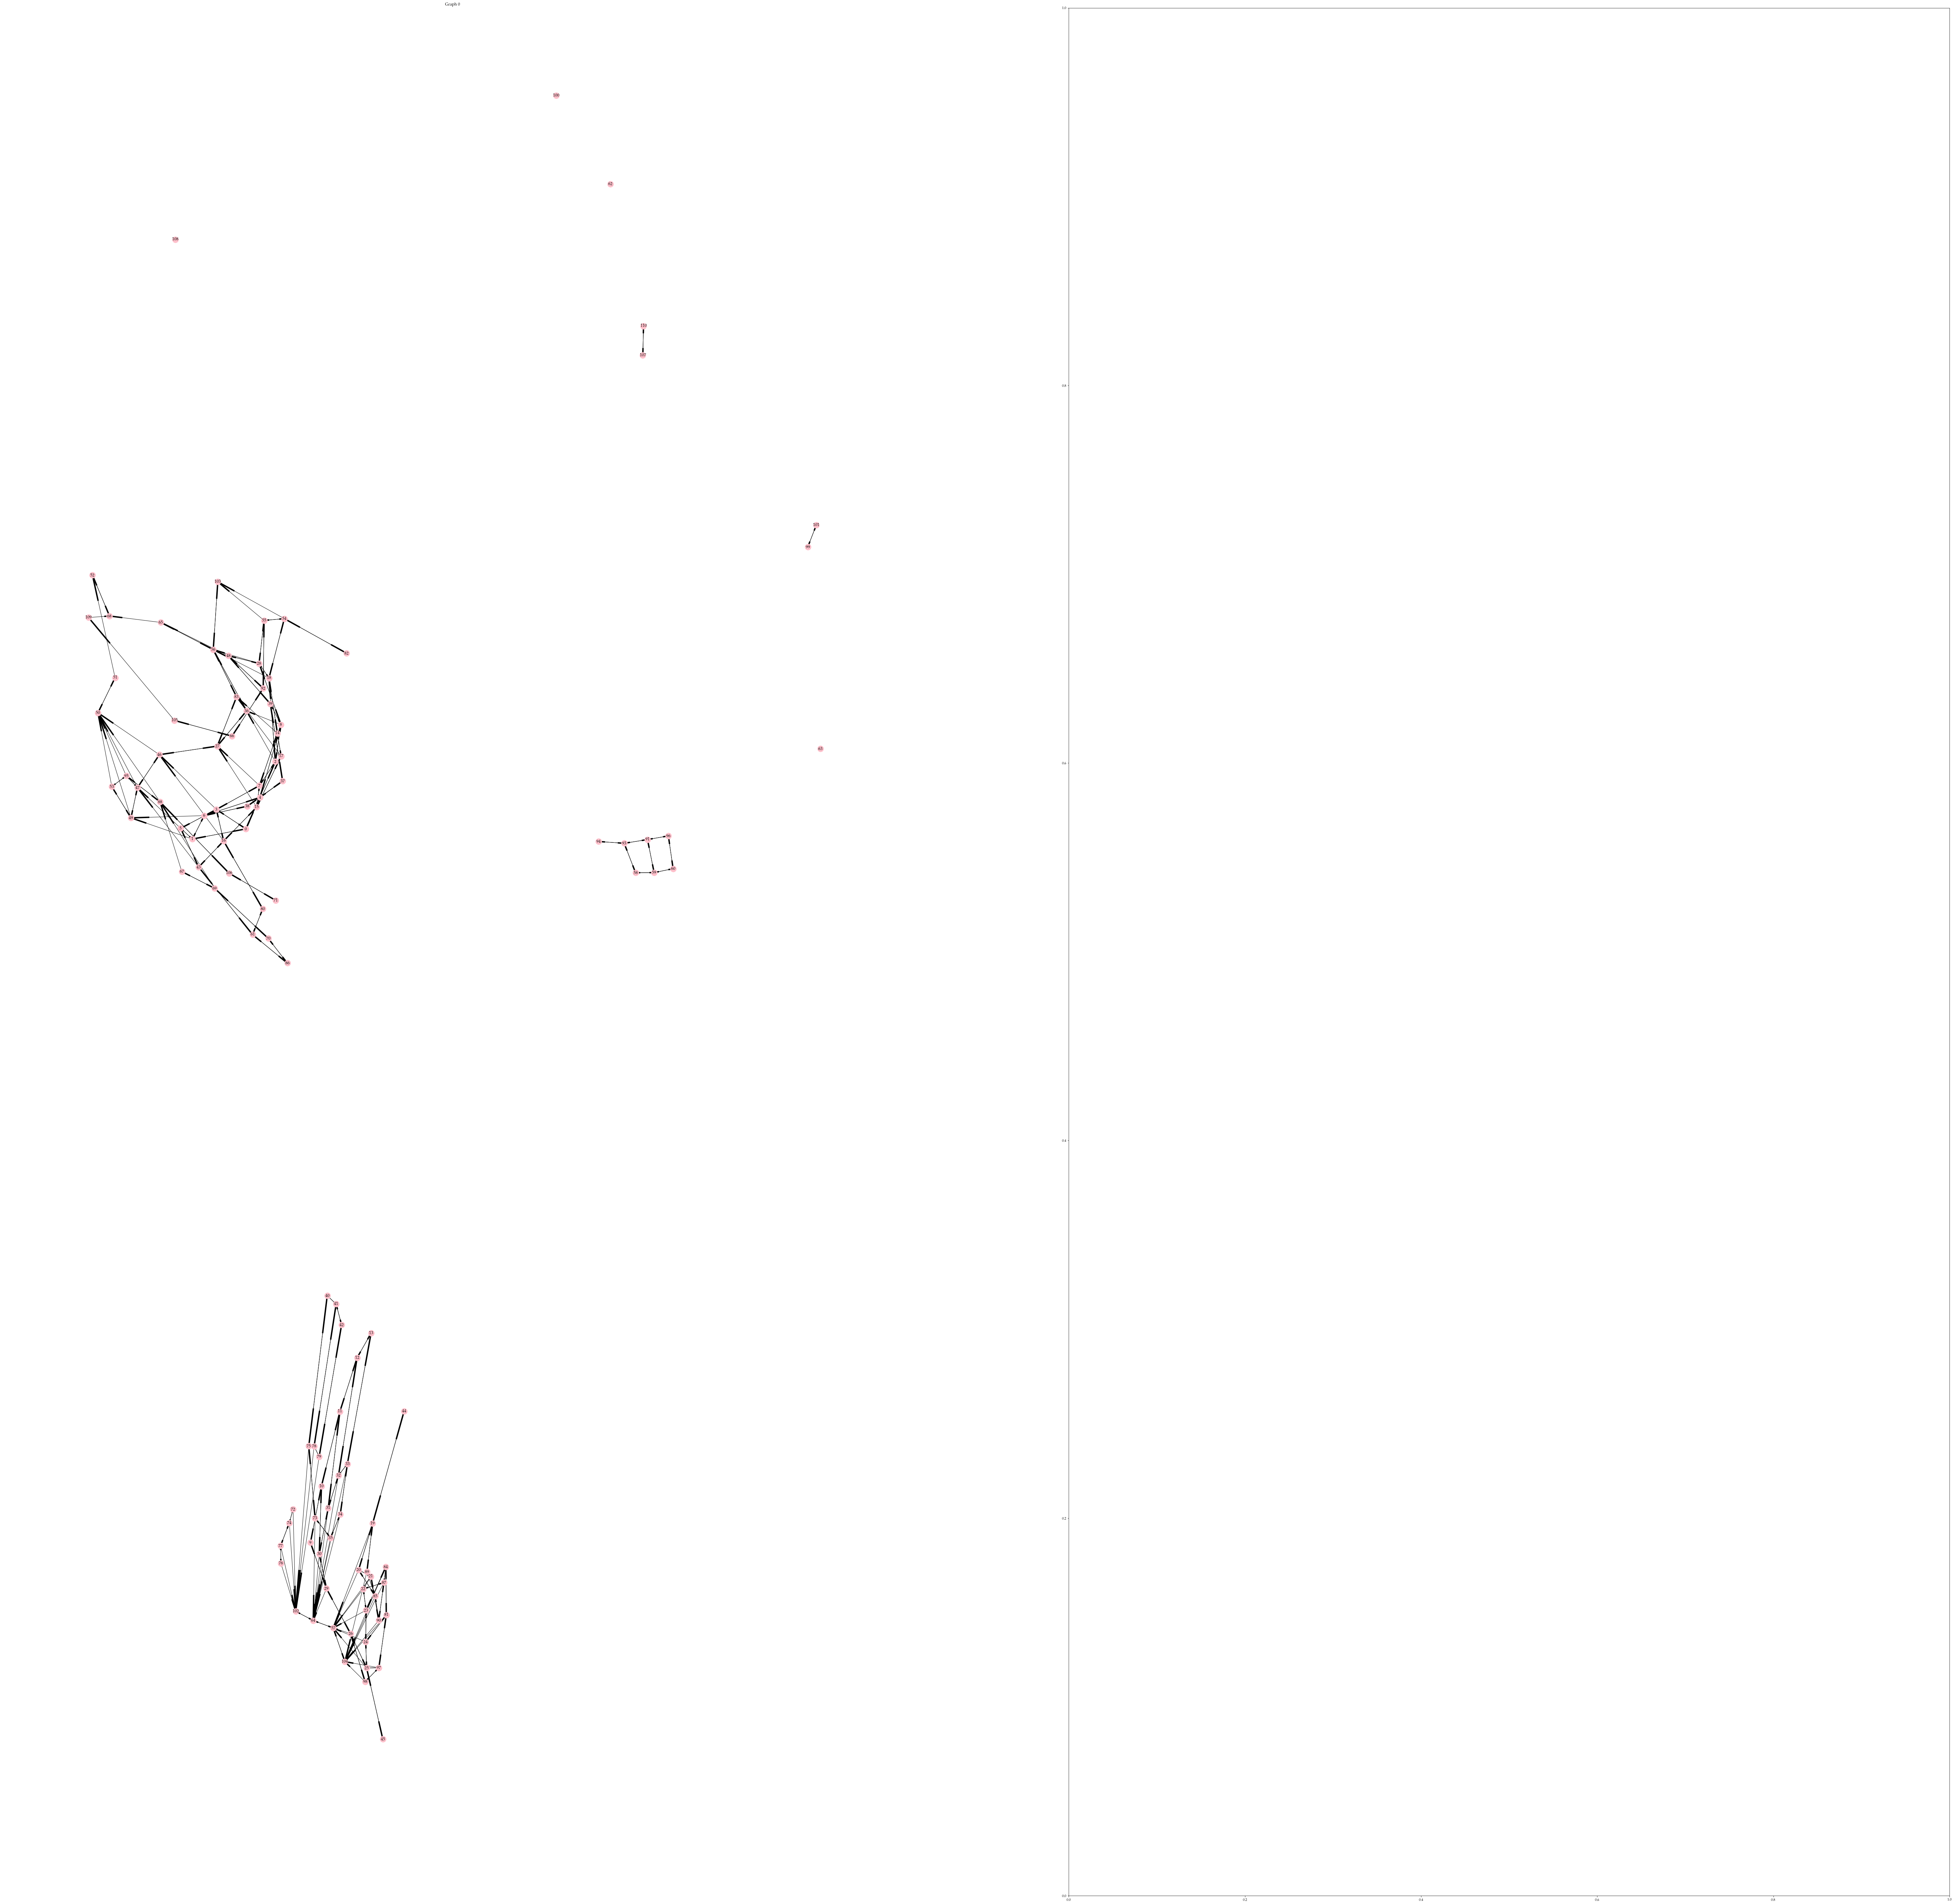

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = ""
tf.config.set_visible_devices([], 'GPU')
tf.debugging.set_log_device_placement(True)

graph_gen = GraphDataGenerator(pi0_file_list=None,
    pion_file_list=pion_files,#["/home/jbohm/start_tf/gn4pions_eastbay/train_testing/train_2/train/data_000.p"],
    cellGeo_file="/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000001.root",
    batch_size=3, 
    shuffle=False,
    num_procs=1,
    preprocess=True,
    output_dir=train_output_dir)

format_args = {
    'node_size': 300,
    'node_color': 'pink',
    'width': 1,
    'with_labels': True,
}

for graphs, targets in graph_gen.generator():
    data_dict_list = convert_to_tuple(graphs)#, track_pts = convert_to_tuple(graphs)
    graphs_tuple = utils_np.data_dicts_to_graphs_tuple(data_dict_list)

    # visualize with networkx
    graphs_nx = utils_np.graphs_tuple_to_networkxs(graphs_tuple) # Note: can't visualize an ordered multidigraph?
    #graphs_nx = utils_np.data_dict_to_networkx(data_dict_list) # Note: can't visualize an ordered multidigraph?
    _, axs = plt.subplots(ncols=2, figsize=(100, 100))
    for iax, (graph_nx, ax) in enumerate(zip(graphs_nx[:1], axs)):
        nx.draw(graph_nx, **format_args, ax=ax)
        ax.set_title("Graph {}".format(iax))
    
    break
    

In [ ]:
pipm_file = uproot.open("/data/atlas/data/allCellTruthv1/pipm/user.mswiatlo.27153452.OutputStream._000001.root:EventTree")
pi0_file = uproot.open("/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000001.root:EventTree")
cell_geo_file = uproot.open("/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000001.root:CellGeo")

In [ ]:
print(np.max(cell_geo_file.arrays()["cell_geo_prevInEta"]))
print(np.min(cell_geo_file.arrays()["cell_geo_prevInEta"]))
print(len(cell_geo_file.arrays()["cell_geo_ID"][0]))

187647
-1
187650


In [ ]:
print((ak.num()pipm_file["truthPartPdgId"].array(), axis=0))
print(ak.num(pi0_file["truthPartPdgId"].array(), axis=0))

#print(ak.num(pipm_file["cluster_cell_ID"].array()[1]))
#print(pipm_file["cluster_nCells"].array()[1])
#print(pipm_file.keys())

400000
2000


In [ ]:
pi0_file_arrays = pi0_file.arrays(library="np")
print(pi0_file_arrays["nCluster"].shape)

for key in pi0_file_arrays:
    pi0_file_arrays[key] = np.tile(pi0_file_arrays[key], 4)

print(pi0_file_arrays["nCluster"].shape)


(2000,)
(8000,)


In [ ]:
#pipm_file_np = pipm_file.arrays(library="np")
#np.save("./pipm_1", pipm_file_np, allow_pickle=True) # converting a root to npy takes 11 min (400,000 events)
pi0_file_np = pi0_file.arrays(library="np")
np.save("./pi0_8000", pi0_file_np, allow_pickle=True)

In [ ]:

pion_files = ["./pipm_1.npy"]
pi0_files = []
 
data_gen_train = GraphDataGenerator(pi0_file_list=pi0_files,
                                        pion_file_list=pion_files,
                                        cellGeo_file="/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000001.root",
                                        batch_size=100, # used to batch graphs/targets during training / validation
                                        shuffle=False, # False if preprocess = True
                                        num_procs=1,
                                        preprocess=True,
                                        output_dir="./")

# 7s for 2000 events => 1400s for 400,000 => ~23 min [took 28 min, went up to ~70Gb of mem used, 30Gb after => 40Gb for this process]


Preprocessing and saving data to ./
Processing file number 0
Finished processing 0 files


In [ ]:
file = "./train_2/pion_files/pion_mix_6000_0.npy"
event_data = np.load(file, allow_pickle=True).item() # dictionary of event groupings
print(event_data["truthPartPdgId"][4][0])

-211


In [ ]:
arr = [10,5,3,7,4]
arg_sort = np.argsort(arr)

print(np.searchsorted(arr, [4,10, 5], sorter=arg_sort))

[1 4 2]


In [ ]:
print(cell_geo_file.keys()[1:9])

['cell_geo_sampling', 'cell_geo_eta', 'cell_geo_phi', 'cell_geo_rPerp', 'cell_geo_deta', 'cell_geo_dphi', 'cell_geo_volume', 'cell_geo_sigma']


In [ ]:
event_data = pi0_file.arrays(library="np")
event_ind = 1
cluster_ind = 0
print(event_data['cluster_cell_ID'][event_ind])
geoFeatureNames = cell_geo_file.keys()[1:9]
cellGeo_data = cell_geo_file.arrays(library="np")
cellGeo_ID = cellGeo_data['cell_geo_ID'][0]
sorter = np.argsort(cellGeo_ID)
print(len(sorter))
print(len(cellGeo_ID))
nodeFeatureNames = ['cluster_cell_E', *geoFeatureNames[:-2]]

print(nodeFeatureNames)
cell_IDs = event_data['cluster_cell_ID'][event_ind][cluster_ind]
cell_IDmap = sorter[np.searchsorted(cellGeo_ID, cell_IDs, sorter=sorter)]

nodes = np.log10(event_data['cluster_cell_E'][event_ind][cluster_ind])
nodes = np.append(nodes, cellGeo_data['cell_geo_sampling'][0][cell_IDmap])
for f in nodeFeatureNames[2:4]:
    nodes = np.append(nodes, cellGeo_data[f][0][cell_IDmap])
nodes = np.append(nodes, cellGeo_data['cell_geo_rPerp'][0][cell_IDmap])
for f in nodeFeatureNames[5:]:
    nodes = np.append(nodes, cellGeo_data[f][0][cell_IDmap])

nodes = np.reshape(nodes, (len(nodeFeatureNames), -1)).T

AttributeError: 'dict' object has no attribute 'arrays'

In [ ]:
# train test 1
pipm_file_1 = uproot.open("/data/atlas/data/allCellTruthv1/pipm/user.mswiatlo.27153452.OutputStream._000001.root:EventTree").arrays(library="np")
pipm_file_2 = uproot.open("/data/atlas/data/allCellTruthv1/pipm/user.mswiatlo.27153452.OutputStream._000002.root:EventTree").arrays(library="np")
pi0_file = uproot.open("/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000001.root:EventTree").arrays(library="np")

cell_geo_file = uproot.open("/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000001.root:CellGeo")

In [ ]:
# files of 400,000 events to make pi+/-/0 dataset
pipm_file_1 = uproot.open("/data/atlas/data/allCellTruthv1/pipm/user.mswiatlo.27153452.OutputStream._000011.root:EventTree").arrays(library="np")
pipm_file_2 = uproot.open("/data/atlas/data/allCellTruthv1/pipm/user.mswiatlo.27153452.OutputStream._000012.root:EventTree").arrays(library="np")
pi0_file = uproot.open("/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000013.root:EventTree").arrays(library="np") # 6min to load

In [ ]:
# split up data and save to npy files of 6000 events (2000 pi0, 4000 pi+/-)
file_indicies = np.arange(len(pi0_file["truthPartPdgId"]))
event_data_indicies = np.arange(6000)
np.random.seed(0)
np.random.shuffle(file_indicies)

for i in range(200):#range(len(pi0_file["truthPartPdgId"]) / 2000):
    np.random.shuffle(event_data_indicies)
    pion_data = {}
    for key in pipm_file_1:
        pion_data[key] = np.zeros(6000, dtype=object)
        pion_data[key][event_data_indicies] = np.concatenate((pi0_file[key][file_indicies[i*2000:(i+1)*2000]], pipm_file_1[key][file_indicies[i*2000:(i+1)*2000]], pipm_file_2[key][file_indicies[i*2000:(i+1)*2000]]))

    np.save("./train_2/pion_files/pion_mix_6000_" + str(i), pion_data, allow_pickle=True)

# estimated time 16 min - 6s / file


In [ ]:
import glob
data_dir = "./train_2/"
output_dir = "./train_2"
num_train_files = 1
num_val_files = 1

# preprocess the data files
pion_files = np.sort(glob.glob(data_dir+'pion_files/*.npy'))

train_start = 0
train_end = train_start + num_train_files
val_end = train_end + num_val_files

pi0_train_files = None
pi0_val_files = None
pion_train_files = pion_files[train_start:train_end]
pion_val_files = pion_files[train_end:val_end]

train_output_dir = None
val_output_dir = None

# Get Data
train_output_dir = output_dir + '/train/'
val_output_dir = output_dir + '/val/'

GraphDataGenerator(pi0_file_list=pi0_train_files,
    pion_file_list=pion_train_files,
    cellGeo_file="/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000001.root",
    batch_size=100, 
    shuffle=False,
    num_procs=1,
    preprocess=True,
    output_dir=train_output_dir)

GraphDataGenerator(pi0_file_list=pi0_val_files,
    pion_file_list=pion_val_files,
    cellGeo_file="/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000001.root",
    batch_size=100,
    shuffle=False,
    num_procs=1,
    preprocess=True,
    output_dir=val_output_dir)


Preprocessing and saving data to ./train_2/train/
Processing file number 0
Finished processing 0 files

Preprocessing and saving data to ./train_2/val/
Processing file number 0
Finished processing 0 files


In [ ]:
pion_files = ["./train_2/pion_files/pion_mix_6000_0.npy"]
pi0_files = []
 
data_gen_train = GraphDataGenerator(pi0_file_list=pi0_files,
                                        pion_file_list=pion_files,
                                        cellGeo_file="/data/atlas/data/allCellTruthv1/pi0/user.mswiatlo.27153451.OutputStream._000001.root",
                                        batch_size=100, # used to batch graphs/targets during training / validation
                                        shuffle=False, # False if preprocess = True
                                        num_procs=1,
                                        preprocess=True,
                                        output_dir="./") # 20s / file


Preprocessing and saving data to ./
Processing file number 0
Finished processing 0 files


In [ ]:
import os
import tensorflow as tf
import numpy as np

os.environ['CUDA_VISIBLE_DEVICES'] = "5"
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

targets = np.zeros((10,2))
tf.convert_to_tensor(targets)

2023-01-30 15:17:58.620763: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9671 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:89:00.0, compute capability: 7.5


<tf.Tensor: shape=(10, 2), dtype=float64, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])>

In [ ]:
for i in range(1):
    print(i)

In [ ]:
arr = np.array([1,2,3,4])
cut = np.array([0,3,2,1])
np.random.shuffle(cut)
arr2 = np.zeros(4)
arr2[cut] = arr

print(arr2)

[3. 2. 1. 4.]


In [ ]:
event_idx = 1
cluster_idx = 0

events = pi0_file.arrays(library="np")
cell_geo_tree = cell_geo_file.arrays(library="np")

print(pi0_file.keys())

print(events["cluster_nCells"][event_idx][cluster_idx])
print(events["cluster_cell_ID"][event_idx][cluster_idx])

['runNumber', 'eventNumber', 'lumiBlock', 'coreFlags', 'mcEventNumber', 'mcChannelNumber', 'mcEventWeight', 'nTruthPart', 'G4PreCalo_n_EM', 'G4PreCalo_E_EM', 'G4PreCalo_n_Had', 'G4PreCalo_E_Had', 'truthVertexX', 'truthVertexY', 'truthVertexZ', 'truthPartPdgId', 'truthPartStatus', 'truthPartBarcode', 'truthPartPt', 'truthPartE', 'truthPartMass', 'truthPartEta', 'truthPartPhi', 'nTrack', 'trackPt', 'trackP', 'trackMass', 'trackEta', 'trackPhi', 'trackNumberOfPixelHits', 'trackNumberOfSCTHits', 'trackNumberOfPixelDeadSensors', 'trackNumberOfSCTDeadSensors', 'trackNumberOfPixelSharedHits', 'trackNumberOfSCTSharedHits', 'trackNumberOfPixelHoles', 'trackNumberOfSCTHoles', 'trackNumberOfInnermostPixelLayerHits', 'trackNumberOfNextToInnermostPixelLayerHits', 'trackExpectInnermostPixelLayerHit', 'trackExpectNextToInnermostPixelLayerHit', 'trackNumberOfTRTHits', 'trackNumberOfTRTOutliers', 'trackChiSquared', 'trackNumberDOF', 'trackD0', 'trackZ0', 'trackEta_PreSamplerB', 'trackPhi_PreSamplerB', 